# TAL Labo 1b : Segmentation de textes avec NLTK

**Objectifs**

Le but de cette deuxième partie du Labo 1 du [Cours TAL](https://cyberlearn.hes-so.ch/course/view.php?id=14966) est d'effectuer quelques opérations élémentaires sur les textes en utilisant la boîte à outils [NLTK](http://www.nltk.org/) en Python.  Vous utiliserez l'environnement mis en place dans la partie 1a : [Python 3.7 ou 3.8](https://www.python.org/) avec _notebooks_ [Jupyter](https://jupyter.org/), soit localement sur votre ordinateur (avec ou sans Conda) ou en ligne sur [Google Colab](https://colab.research.google.com).

Vous utiliserez NLTK pour obtenir des textes en ligne ou localement, puis vous les segmenterez en phrases et en mots (appelés aussi _tokens_).  Vous calculerez aussi des statistiques sur ces textes.  Vous travaillerez d'abord sur des textes en anglais (1b et 1c), puis en français (1d).

## 1. NLTK: Natural Language Toolkit

Pour ajouter NLTK à votre installation locale de Python, suivez les instructions sur le [site web NLTK](http://www.nltk.org/install.html).  Sur Google Colab, NLTK est déjà installé.

Pour utiliser NLTK en Python (y compris dans un _notebook_ Jupyter), vous pouvez écrire `import nltk`, puis accéder à toutes les commandes avec le préfixe `nltk.`.  Si vous écrivez `from nltk.book import *`, cela importera des commandes et des variables (p.ex. une collection de textes) qui seront accessibles sans utiliser le préfixe. 

**Remarques**
* Le but de ce laboratoire est de vous initier à NLTK.  Vous pouvez aussi parcourir le [Chapitre 1](http://www.nltk.org/book/ch01.html) du [livre NLTK (*NLP with Python*)](http://www.nltk.org/book/) et essayer les commandes indiquées.  
* Veuillez noter que le [livre en ligne](http://www.nltk.org/book/) est mis à jour pour Python 3, mais la [version imprimée](http://shop.oreilly.com/product/9780596516499.do) que l'on peut parfois trouver en PDF est pour Python 2. 
* NLTK inclut un gestionnaire de téléchargements qui peut être invoqué depuis un interpréteur Python en ligne de commande (écrire `python3` en ligne de commande) avec les deux commandes `import nltk` puis `nltk.download()`.  Cela vous permettra de télécharger de nombreux corpus _additionnels_ (i.e. collections de textes), mais que nous n'utiliserons pas en laboratoire.

In [5]:
import nltk

from nltk.book import *

Écrivez une phrase en anglais (liste de mots / string) que vous appelerez `sentence1`.  

Affichez sa longueur avec `len()`.  

Utilisez `nltk.bigrams` pour générer tous les bi-grammes (couples de mots adjacents) à partir de cette liste.  Un exemple est montré dans la [section 3.3 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#collocations-and-bigrams).  

Enfin, trier les bi-grammes par ordre alphabétique et afficher le résultat.

In [6]:
sentence1 = "After this course, we will go do some gym with a cheat code."
print (len(sentence1))
bigrams = sorted(list(nltk.bigrams(sentence1.split())))
print(bigrams)

60
[('After', 'this'), ('a', 'cheat'), ('cheat', 'code.'), ('course,', 'we'), ('do', 'some'), ('go', 'do'), ('gym', 'with'), ('some', 'gym'), ('this', 'course,'), ('we', 'will'), ('will', 'go'), ('with', 'a')]


Défnissez une chaîne appelée `string2` contenant une phrase.  Utilisez le *tokenizer* de NLTK (fonction `nltk.word_tokenize`, expliquée dans la [section 3.1 du livre NLTK](http://www.nltk.org/book/ch03.html#sec-accessing-text)) pour segmenter la chaîne en mots, qui seront rassemblés dans une liste que vous appelerez `sentence2`.  Affichez cette liste.

In [7]:
string2 = "Ceci est une superbe belle phrase."
sentence2 = nltk.word_tokenize(string2)
print(sentence2)

['Ceci', 'est', 'une', 'superbe', 'belle', 'phrase', '.']


## 2. Utiliser NLTK pour télécharger, segmenter et sauvegarder un texte

Inspirez-vous du [chapitre 3 (3.1. Processing Raw Text) du livre NLTK](http://www.nltk.org/book/ch03.html) pour télécharger un fichier avec du texte en ligne, par exemple un livre anglais du Projet Gutenberg.  Stocker le contenu dans une chaîne.

In [8]:
from urllib import request
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
print(type(raw))
print(len(raw))
print(raw[:75])

<class 'str'>
1176812
﻿The Project Gutenberg eBook of Crime and Punishment, by Fyodor Dostoevsky


En inspectant la chaîne précédente, déterminez quelle partie du début et de la fin il faut enlever pour garder le texte principal.  Vous pouvez utiliser la notation dite de *slicing* en Python, ou identifier les chaînes où commence et finit le véritable texte.  Quelle est la longueur de ce texte en caractères ?  (Lien utile : [support d'Unicode dans Python](https://docs.python.org/3.7/howto/unicode.html).)

In [9]:
start = raw.find("PART I")
end = raw.rfind("END OF THE PROJECT GUTENBERG")
print(start)
print(end)
text = raw[start:end]
print(f'Longeur du texte: {len(text)}' )
print(text.find("PART I"))

5575
1158053
Longeur du texte: 1152478
0


Vous allez maintenant segmenter le texte en phrases et les écrire dans un fichier avec une phrase par ligne.  Vous allez également segmenter chaque phrase en _tokens_ (mots et ponctuations), et créer un autre fichier, avec une phrase par ligne, et un espace entre chaque _token_.  Vous aurez besoin des fonctions suivantes de nltk:
* `nltk.sent_tokenize(...)` (documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.word_tokenize)) (notez que le nom "sentence tokenize" n'est pas très logique)
* `nltk.word_tokenize(...)` (documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.sent_tokenize))

**Segmentez le texte en phrases avec NLTK.** Affichez le nombre de phrases obtenues, et un court extrait de 5-6 phrases.  Comment appréciez-vous la qualité de la segmentation ?  *Note :* si certains caractères spéciaux vous semblent péjorer la segmentation, vous pouvez les remplacer dans la chaîne globale avec la fonction `.replace('s1', 's2')`.

In [10]:
formattedText = text.replace('\r', '').replace('\n', ' ')
sentences = nltk.sent_tokenize(formattedText)
print(len(sentences))

for i in range(6):
    print(str(i + 1) + '. ' + sentences[i])

11907
1. PART I    CHAPTER I  On an exceptionally hot evening early in July a young man came out of the garret in which he lodged in S. Place and walked slowly, as though in hesitation, towards K. bridge.
2. He had successfully avoided meeting his landlady on the staircase.
3. His garret was under the roof of a high, five-storied house and was more like a cupboard than a room.
4. The landlady who provided him with garret, dinners, and attendance, lived on the floor below, and every time he went out he was obliged to pass her kitchen, the door of which invariably stood open.
5. And each time he passed, the young man had a sick, frightened feeling, which made him scowl and feel ashamed.
6. He was hopelessly in debt to his landlady, and was afraid of meeting her.


La segmentation semble cohérente. Les débuts de chapitres faussent un peu la segmentation, mais c'est acceptable en considérant le faible pourcentage que ces textes représentes sur le texte entier.

Enregistrez le résultat au format texte, en écrivant chaque phrase sur une ligne.  Vérifiez le résultat en examinant le fichier avec un éditeur de texte.

In [11]:
import os

In [12]:
filename1 = "sample_text_1.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_text_1.txt
if os.path.exists(filename1): 
    os.remove(filename1)
fd = open(filename1, 'a', encoding='utf8')

for sentence in sentences:
  fd.write(sentence + '\n')

fd.close()

**Segmentez maintenant chaque phrase en tokens (mots et ponctuations).**  Stockez le résultat dans une nouvelle variable (liste de listes).  Affichez quelques phrases et commentez la qualité de la tokenisation.

In [13]:
tokens = []
for sentence in sentences:
  tokens += [nltk.word_tokenize(sentence)]

print(tokens[0:2])

[['PART', 'I', 'CHAPTER', 'I', 'On', 'an', 'exceptionally', 'hot', 'evening', 'early', 'in', 'July', 'a', 'young', 'man', 'came', 'out', 'of', 'the', 'garret', 'in', 'which', 'he', 'lodged', 'in', 'S.', 'Place', 'and', 'walked', 'slowly', ',', 'as', 'though', 'in', 'hesitation', ',', 'towards', 'K.', 'bridge', '.'], ['He', 'had', 'successfully', 'avoided', 'meeting', 'his', 'landlady', 'on', 'the', 'staircase', '.']]


La tokenisation semble bien fonctionner, par exemple le "K." est bien compté comme un seul token et pas comme deux distincts dont l'un des deux serait le point seul. Ce soucis pourrait arriver si nous faisions une tokenisation "à la main", en splittant directement sur les points par exemple.

Calculez le nombre total de _tokens_ obtenus.

In [14]:
total_elements = sum(len(token) for token in tokens)
print(total_elements)

252743


Enregistrez le résultat au format texte, en écrivant chaque phrase sur une ligne et en insérant un espace entre chaque _token_.  Vérifiez le résultat en examinant le fichier avec un éditeur de texte.

In [15]:
filename2 = "sample_text_2.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_text_2.txt
if os.path.exists(filename2): 
    os.remove(filename2)
fd = open(filename2, 'a', encoding='utf8')

for tokens_of_sentence in tokens:
  fd.write(' '.join(tokens_of_sentence) + '\n')

fd.close()

Il est également possible de *tokeniser un texte sans le segmenter préalablement en phrases*.
* Effectuez cette opération directement sur la chaîne de caractères contenant tout le texte.  
* Affichez et observez un court extrait. 
* Demandez le nombre total de tokens et comparez-le avec le nombre précédent.  
* Il n'est pas demandé ici d'écrire le résultat dans un fichier.

In [16]:
tokens_v2 = nltk.word_tokenize(formattedText)
print(tokens_v2[:50])
print(len(tokens_v2))


['PART', 'I', 'CHAPTER', 'I', 'On', 'an', 'exceptionally', 'hot', 'evening', 'early', 'in', 'July', 'a', 'young', 'man', 'came', 'out', 'of', 'the', 'garret', 'in', 'which', 'he', 'lodged', 'in', 'S.', 'Place', 'and', 'walked', 'slowly', ',', 'as', 'though', 'in', 'hesitation', ',', 'towards', 'K.', 'bridge', '.', 'He', 'had', 'successfully', 'avoided', 'meeting', 'his', 'landlady', 'on', 'the', 'staircase']
252743


Nous perdons la séparation en phrase mais nous obtenons le même nombre de tokens. Nous observons donc bien que NLTK a bien réalisé une segmentation en phrases (en arrière plan) avant de tokeniser.

## 3. Calculer diverses statistiques avec NLTK
Pour calculer des statistiques, il faut d'abord créer un objet de type `nltk.Text`.  Ces objets peuvent être créés avec : 
1. la chaîne de caractères constituant le texte
2. la liste de tous les mots du texte (chaînes)
3. la liste de toutes les phrases (liste de listes)

**Attention:**

* seule l'option (2) permet d'utiliser correctement les méthodes de `nltk.Text`
* les méthodes `nltk.word_tokenize()` et `nltk.sent_tokenize()` s'appliquent à des chaînes, pas des `nltk.Text`

Créez et stockez dans une variable un objet `nltk.Text` à partir de la liste des tokens de votre texte.  (Vous pouvez appeler ici `nltk.word_tokenize`.)

In [17]:
nltk_text = nltk.Text(tokens_v2)

Le [chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html) montre des exemples d'opérations que l'on peut effectuer sur un objet `nltk.Text`.  Par exemple, on peut afficher les occurrences d'un mot et leur contexte immédiat avec la méthode `concordance`, ou trouver des mots qui ont des contextes semblables à un mot donné avec `similar`.  Veuillez expérimenter ci-dessous avec ces deux méthodes et afficher un résultat à chaque fois.

In [18]:
nltk_text.concordance("monstrous")

Displaying 6 of 6 matches:
ry semblance of reality . At times monstrous images are created , but the setti
 .... It seemed to him strange and monstrous that he could have slept in such f
unced it all as something absurd , monstrous and impossible . But a whole mass 
looks , had grown in an instant to monstrous proportions , and that this was fe
ot just now ! ” “ The fact is this monstrous difference in age and development 
to describe such adventures with a monstrous project of the same sort in his mi


In [19]:
nltk_text.similar("monstrous")

in he and with not for so from that at all by thinking now hair even
knew grotesque how let


En utilisant la méthode `collocation_list`, veuilez afficher les 10 collocations les plus fréquentes dans votre texte.

In [20]:
nltk_text.collocation_list(10)

[('Katerina', 'Ivanovna'),
 ('Pyotr', 'Petrovitch'),
 ('Pulcheria', 'Alexandrovna'),
 ('Avdotya', 'Romanovna'),
 ('Rodion', 'Romanovitch'),
 ('Marfa', 'Petrovna'),
 ('Sofya', 'Semyonovna'),
 ('old', 'woman'),
 ('Porfiry', 'Petrovitch'),
 ('Amalia', 'Ivanovna')]

On peut déterminer le vocabulaire d'un texte (c'est-à-dire la liste des _types_) simplement en convertissant la liste des mots (occurrences ou _tokens_) à un `set` en Python.  
* Veuillez calculer ainsi le vocabulaire de votre texte.
* Combien de mots différents a-t-il ?  (En incluant les ponctuations et tout autre symbole.) 
* Quels sont les mots qui ont plus de 15 lettres ?  (Ou une autre taille qui vous semble intéressante.)

In [21]:
tokens_set = set(tokens_v2)
print(f'Nombre de mots: {len(tokens_set)}')
tokens_set_filtered = [token for token in tokens_set if len(token) > 15]
print(f'Nombre de mots > 15: {len(tokens_set_filtered)}')
print(tokens_set_filtered)

Nombre de mots: 11012
Nombre de mots > 15: 30
['frightened-looking', 'self-confidently', 'disproportionately', 'pawnbroker-woman', 'evil-intentioned', 'well-proportioned', 'superciliousness', 'sinister-looking', 'waistcoat-pocket', 'misunderstanding', 'cross-examination', 'indiscriminately', 'conscience-prick', 'Schleswig-Holstein', 'Cough-cough-cough', 'terrible-looking', 'Governor-General', 'half-broken-down', '_psychologically_', 'grey-and-rainbow-coloured', 'straight-forward', '_Hof-kriegsrath_', 'delicate-looking', 'indistinguishable', 'circumstantially', 'horrible-looking', 'poverty-stricken', 'governor-general', 'disproportionate', 'enthusiastically']


**Distributions de fréquence (Frequency Distributions)**

NLTK peut facilement calculer les fréquences de tous les _tokens_ dans un `nltk.Text`.  Le résultat est stocké dans un objet de type `FreqDist` (pour _frequency distribution_) comme montré dans la [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).  À partir de là, on peut déterminer les mots les plus fréquents.

Veuillez construire la distribution de fréquences de votre texte.

In [22]:
fdist = FreqDist(nltk_text)

Affichez les mots qui ont plus de 4 lettres parmi les 70 mots les plus fréquents.

In [23]:
print([word_occ for word_occ in fdist.most_common(70) if len(word_occ[0]) > 4])

[('Raskolnikov', 782), ('there', 597), ('would', 552), ('about', 522)]


## 4. Graphiques
La librairie `matplotlib` permet d'afficher les statistiques des textes sous forme graphique.  Pour la rendre accessible dans le _notebook_ (une fois installée dans Python), il faut exécuter les deux lignes suivantes.

Nous allons utiliser les fonctions graphiques de NLTK, mais il est possible de générer directement des graphiques à partir de deux listes `x_values` et `y_values` avec la commande `matplotlib.pyplot.plot(x_values, y_values)`.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

Affichez le graphique cumulatif des nombres d'occurrences des 70 mots les plus fréquents de votre texte, en vous inspirant de la  [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).

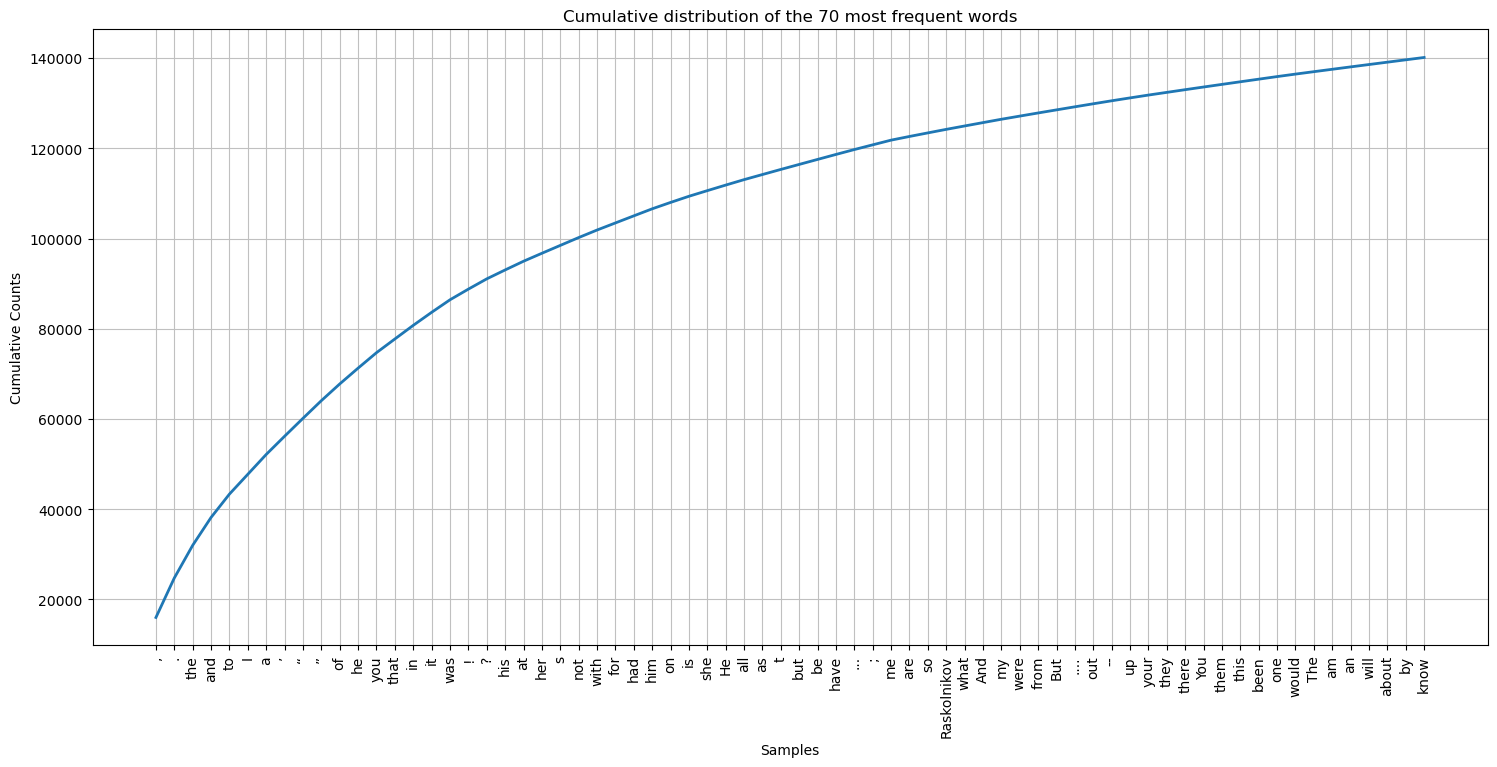

<Axes: title={'center': 'Cumulative distribution of the 70 most frequent words'}, xlabel='Samples', ylabel='Cumulative Counts'>

In [25]:
plt.figure(figsize=(18, 8))
fdist.plot(70, cumulative=True, title="Cumulative distribution of the 70 most frequent words")

Maintenant, construisez une liste avec la longueur de chaque _token_ du texte (la liste aura donc autant de nombres que de tokens).  Créez un nouvel objet `FreqDist` à partir de cette liste, et affichez la distribution (cette fois-ci _non_-cumulative) des nombres d'occurrences.  Quelle est la longueur la plus fréquente ?  Comment évolue la longueur en fonction de la fréquence ?

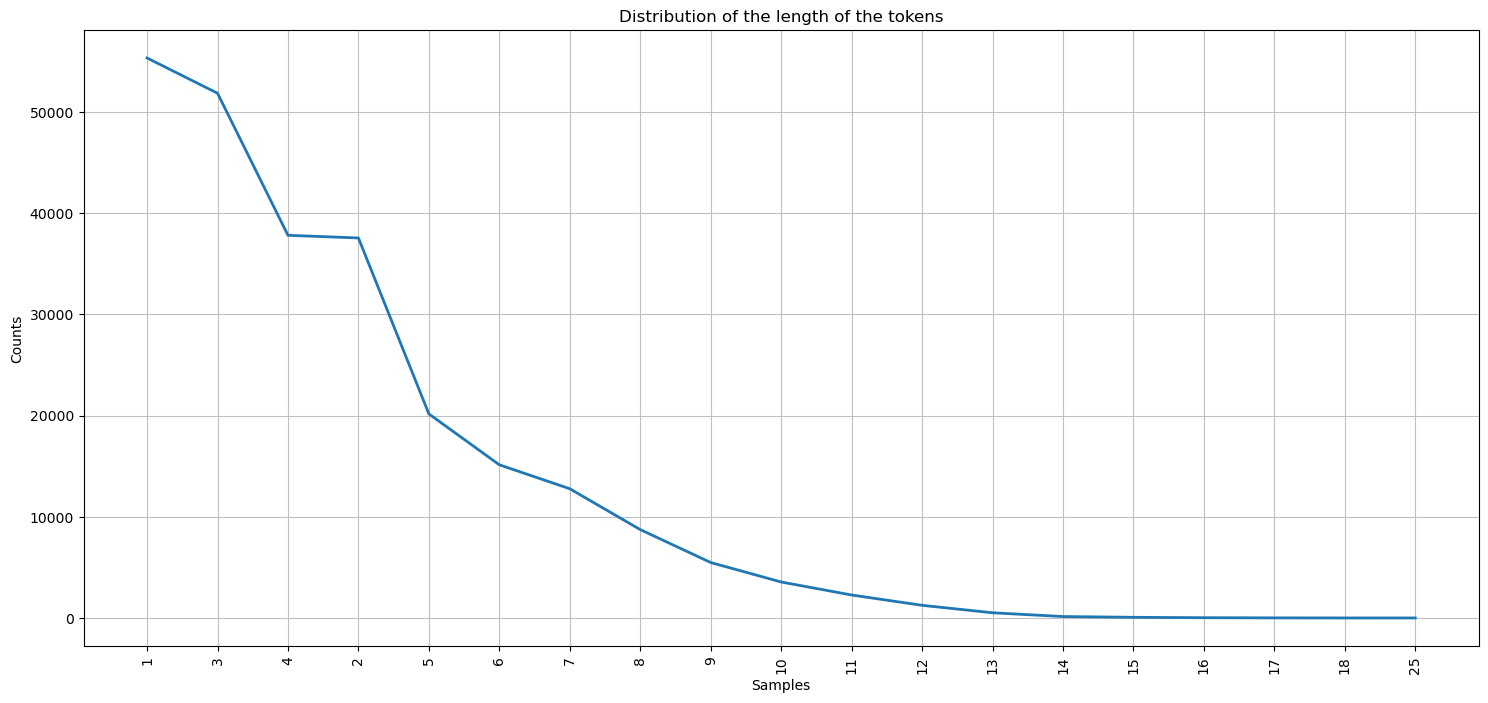

<Axes: title={'center': 'Distribution of the length of the tokens'}, xlabel='Samples', ylabel='Counts'>

In [26]:
tokens_length = [len(token) for token in tokens_v2]
fdist2 = FreqDist(tokens_length)

plt.figure(figsize=(18, 8))
fdist2.plot(title="Distribution of the length of the tokens")

La courbe va logiquement descendre car il y a naturellement plus d'occurrences de mots courts que de mots longs. 

Il est quand même intéressant de voir qu'il y a moins d'occurrences de mots de 2 lettres que de 3 et 4. 

En observant le graphe cumulatif, on retrouve fréquemment des mots de 3-4 lettres comme "the", "and", "you", "have", "with", "that".

A partir de 15 lettres, le nombre d'occurrences diminue très rapidement et tend vers 0. On pourrait supposer que la courbe serait légèrement différente pour d'autres langues comme l'allemand où les mots (très) longs sont plus fréquents.

## Fin de la partie 1b
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_.  Puis ajoutez-le dans une archive _zip_ avec les _notebook_ des parties 1c et 1d, et soumettez l'archive individuellement sur Cyberlearn (_Laboratoire 1_). 